## Views Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [34]:
data = pd.read_csv("train.csv")

In [3]:
data.shape

(19600, 9)

In [35]:
data.head()

,video_id,title,channel,country,views,likes,comments,published_at,fetch_date
0,YxN91uTP5lY,Tạp hoá bất ngờ ổn p266(chiếc kẹo ảo thuật thậ...,Tạp Hóa Bất Ổn,VN,1811628,28952,14,2025-03-15T10:00:41Z,2025-03-18 11:10:24
1,vlPDhY7wXaU,wow,dednahype,RS,79865822,949854,973,2025-05-02T12:59:15Z,2025-05-09 11:10:12
2,rOqgtIqB_Z4,ΑΛΕΞΑΝΔΡΟΣ ΤΣΟΥΒΕΛΑΣ: Στα hate comments τσακών...,Unblock,GR,334394,10139,320,2025-06-04T11:01:35Z,2025-06-18 11:10:10
3,mxPnFfTrSKE,Lo mejor y lo peor de 2024 #7,Tri-line,PE,713079,60504,1595,2025-03-15T19:30:04Z,2025-03-22 11:09:13
4,ycLFqJ_xssk,"DORAYAKI (Videoclip Oficial) - Karina, Hugo23,...",Karina y Marina,AR,937230,31811,8903,2025-04-25T16:00:07Z,2025-04-26 11:07:54


In [5]:
# 2. Drop missing target values
data.dropna(subset=["views"], inplace=True)

#### Which channel gets the highest average likes & comments per video?

In [6]:
channel_stats = data.groupby('channel')[['likes','comments']].mean().sort_values(by='likes', ascending=False)
print(channel_stats)

                                  likes       comments
channel                                               
Rockstar Games             5.533381e+06  456327.444444
MrBeast                    4.287317e+06   34342.508696
YT Object                  3.540238e+06    3463.428571
Jojo Sim                   3.281818e+06    5698.428571
Mazizien                   2.872918e+06   12514.294118
...                                 ...            ...
FRATELLI IMPERFETTI        0.000000e+00       0.000000
Nitro Circus               0.000000e+00    3906.714286
Operación Triunfo Oficial  0.000000e+00     179.500000
Samouha Mouha              0.000000e+00     639.000000
The BN Family              0.000000e+00      65.000000

[5763 rows x 2 columns]


#### Country-Level Trends

In [7]:
country_stats = data.groupby('country')[['likes','comments']].mean().sort_values(by='likes', ascending=False)
print(country_stats)


                likes      comments
country                            
DK       1.117791e+06   4183.649215
LU       1.014622e+06   8701.684211
MT       1.013183e+06  10240.676617
MY       9.787265e+05   3967.989848
NO       9.572778e+05  12732.218605
...               ...           ...
FR       5.156472e+04   3075.778281
ID       4.706119e+04   4205.754630
AT       3.881517e+04   2565.174757
JP       2.505630e+04   1670.131707
KR       2.268610e+04   2052.284314

[93 rows x 2 columns]


In [8]:
X = data.drop(columns=["views"])
y = data["views"]

In [9]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [10]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [11]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42))
])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['likes', 'comments']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['video_id', 'title',
                                                   'channel', 'country',
                                                   'published_at',
                                                   'fetch_date'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=6, n_estimators=300,
                                           random_state=42))])

In [14]:
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Root Mean Squared Error: 4764593.4943875605
R² Score: 0.9675477044399328


# Testing

In [15]:
df1 = pd.read_csv('test.csv')
df1.head()

,video_id,title,channel,country,likes,comments,published_at,fetch_date
0,umVWIbMlw-E,مهنة حارس ❌ إصابة خلتني لاعب حر بدون نادي 😰 ..!!,Ismailinho اسماعيلينو,LB,21635,280,2025-05-13T15:56:22Z,2025-05-23 11:10:00
1,aQRLVGiPRw4,一家人吃小龙虾，一个不留神就都没了#熊孩子 #坑爹,四小只吖,TH,19690,27,2025-06-10T11:30:01Z,2025-06-13 11:10:52
2,y-lPiGroY0s,الكورة مع فايق | وصلة ضحك في قهوة فايق بسبب قص...,MBC MASR 2,AE,3037,114,2025-02-14T21:33:48Z,2025-02-17 11:08:37
3,XDBfxnVxy6I,Be sure to remember this trick! How to securel...,Simple Creative,LV,333018,2429,2025-03-24T06:00:28Z,2025-04-11 11:09:33
4,2fzU6ZjLQDA,"Carin León, Alejandro Fernández - Me Está Doli...",Carin Leon,BO,54659,1915,2025-05-08T23:59:42Z,2025-05-15 11:09:34


In [16]:
X_test = df1[['video_id','title','channel','country','likes','comments','published_at','fetch_date']]

In [17]:
y_val = list(pipeline.predict(X_test))

In [18]:
X_val = [311815, 1487668, 186117, 39796426, 4180835, 5396094, 131323, 19958292, 28470111, 689342, 206985, 1393226, 47487029, 31640777, 3976767, 376405, 1093442, 763423, 28897686, 25263493, 6488745, 238929, 46105061, 1644950, 1043315, 43512746, 323425, 5296858, 27510671, 367052, 74058, 8935976, 43634576, 908253, 12894144, 3170582, 884943, 3917383, 37875045, 22413805, 995635, 785302, 608495, 58529209, 7975969, 1349773, 5125360, 1355424, 434979, 129796291, 255660, 48480396, 432325, 4459529, 50201235, 638216, 3385517, 226739, 1439585, 255128, 726631, 59613035, 8575580, 37757627, 147096, 2490175, 3708918, 121924, 201950, 21408469, 337661, 4562471, 2653965, 1140994, 4080010, 6789865, 72896, 1050837, 750980, 297026, 164550, 1386055, 356720, 1120786, 3498961, 25202218, 19509636, 2476248, 4686673, 453199, 834155, 521793, 48567997, 2748936, 86790315, 39046794, 80166098, 34196055, 329848, 2498264, 4358907, 2306109, 1127982, 214124, 22107223, 70243389, 507486, 352123, 55045633, 43125926, 51327, 4180161, 30691814, 12664194, 3394356, 678860, 199096, 15540758, 35193824, 1011582, 7259834, 1561759, 4515206, 2051597, 14000560, 27939734, 2406937, 3148112, 48181406, 971409, 35912173, 1628691, 16426145, 29289433, 40973400, 19265017, 68763838, 42003860, 2817435, 698805, 619525, 3480470, 368285, 1433397, 186738, 12514724, 779646, 2393009, 5171208, 8090747, 93327747, 2411465, 25910518, 10619463, 438886, 37345406, 1253081, 2375796, 3668764, 60949529, 1368476, 313446, 2523394, 432307, 17918420, 8075471, 309864, 18859176, 795725, 14030859, 170587, 56499686, 13330334, 2120373, 2047445, 661205, 574375, 184732, 1181603, 8815001, 418419, 57485906, 5166949, 46352906, 484943, 132389, 47464319, 46219, 5408248, 124850, 3158689, 14557849, 538682, 848334, 66955702, 2310339, 77957134, 8644773, 365431, 173431, 9451386, 747138, 18447008, 228841, 286153, 223141, 1635377, 4153520, 692299, 9315511, 321945, 1599140, 6170021, 32086477, 9910339, 23201803, 708334, 1384308, 1332419, 8587115, 10468555, 7578443, 237598, 36668367, 279555, 180078, 3859395, 14093222, 10179953, 1341298, 154199, 39472583, 7591364, 674355, 7599077, 138573, 16700972, 9200262, 4806910, 1544978, 31709111, 1447185, 10364430, 205143, 236629, 14012780, 1769038, 215689, 95626, 11545011, 1183813, 248952, 17306707, 5837807, 10377791, 944209, 4533118, 45302114, 426031, 31185233, 1439845, 1263819, 4067223, 8997517, 1092953, 2284274, 531621, 370051, 25135954, 253398, 81674288, 86113099, 10295895, 304902, 2988482, 1615272, 498807, 50615147, 397611, 896956, 2649983, 4778779, 4210643, 220023, 70809210, 18961572, 19678101, 53180710, 143442, 3129901, 1189102, 1883824, 8235470, 8023243, 413706, 23749281, 3392127, 221179, 32833016, 123233, 257351, 1572142, 82589876, 104456525, 116783, 2159611, 187466, 232874, 42636233, 5882960, 540535, 227052, 51034975, 10995442, 2671713, 23543849, 924415, 7480380, 2704379, 680013, 434483, 228991, 750798, 78677213, 22694881, 690753, 22036364, 24581207, 53651120, 229521, 45727367, 12568670, 1747507, 1610836, 506427, 11039427, 284777, 450030, 7968208, 54155469, 13658591, 2919734, 1378484, 71180, 1627474, 332010, 1661759, 1054438, 469625, 1917820, 4502571, 428468, 108155, 518967, 151901, 1020022, 1742382, 255318, 847270, 2939866, 823363, 771494, 605362, 148488, 2075732, 3803168, 1569207, 651508, 37449351, 1520002, 34982109, 2857747, 273111, 163859, 21327468, 129940879, 65760, 28193936, 5227442, 220809, 1118165, 64949823, 8605441, 511974, 18871053, 1969122, 691252, 34274836, 3147395, 2278611, 149374180, 117313654, 18606764, 184837, 563712, 10093385, 2264226, 447603, 463548, 266980]

In [19]:
r2_score(y_val, X_val)

0.9386280361023444

C:\Users\2656818\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129657 (\N{ADHESIVE BANDAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2656818\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2656818\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129483 (\N{BUBBLE TEA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2656818\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2656818\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HE

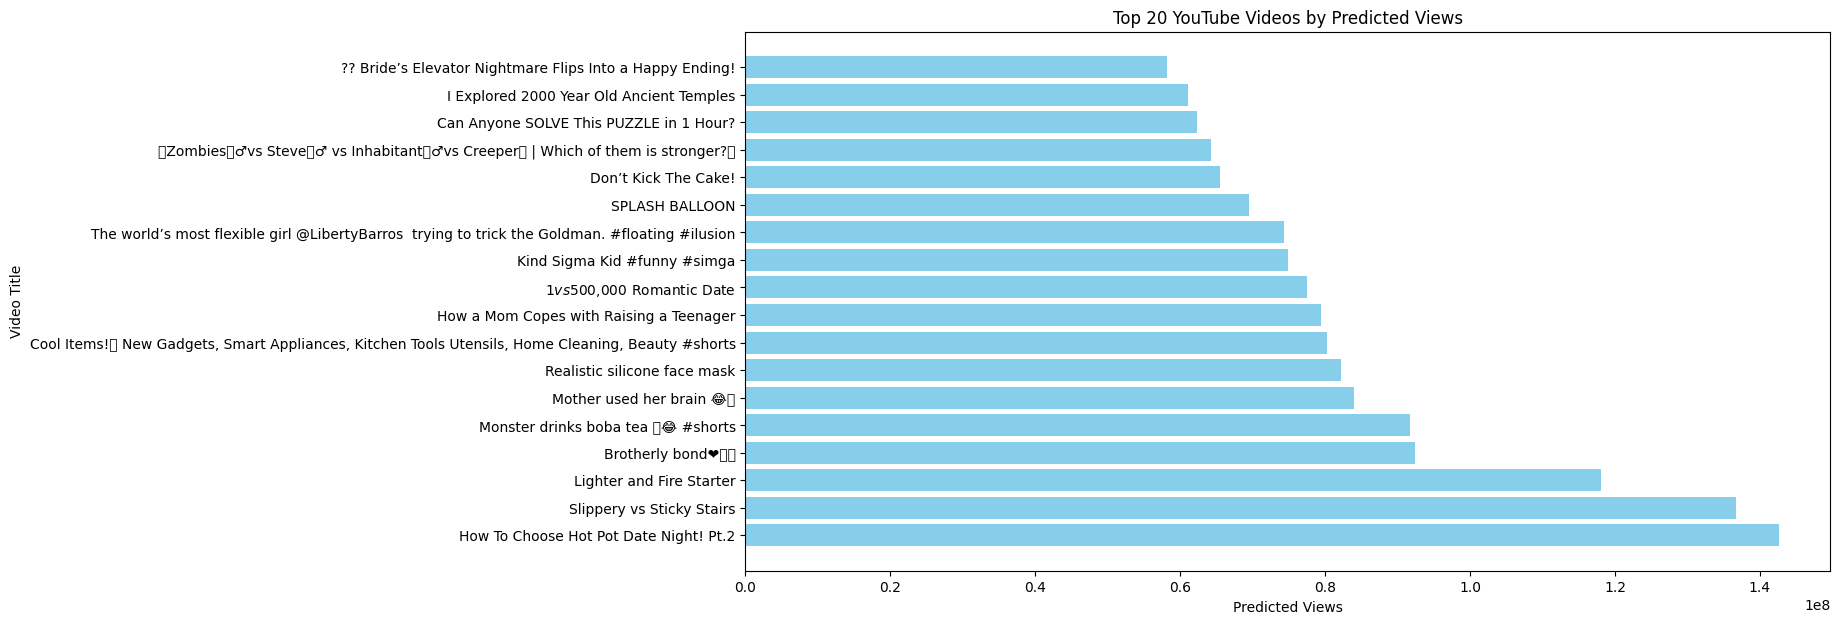

Top 5 Predicted Trending Videos:
                                      title  predicted_views
390  How To Choose Hot Pot Date Night! Pt.2     1.425953e+08
375               Slippery vs Sticky Stairs     1.367008e+08
49                 Lighter and Fire Starter     1.181038e+08
323                     Brotherly bond❤️‍🩹🤝     9.243886e+07
391      Monster drinks boba tea 🧋😂 #shorts     9.173208e+07


In [22]:
import matplotlib.pyplot as plt

# Add predicted views to test dataframe
df1["predicted_views"] = y_val

# Sort by predicted views
df_sorted = df1.sort_values(by="predicted_views", ascending=False)

# Plot Top 20 predicted videos
plt.figure(figsize=(14, 7))
plt.barh(df_sorted["title"].head(20), df_sorted["predicted_views"].head(20), color="skyblue")
# plt.gca().invert_yaxis()  # Highest on top
plt.xlabel("Predicted Views")
plt.ylabel("Video Title")
plt.title("Top 20 YouTube Videos by Predicted Views")
# plt.tight_layout()
plt.show()

# Print top 5 predictions
print("Top 5 Predicted Trending Videos:")
print(df_sorted[["title", "predicted_views"]].head(5))


# Clustering

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [24]:
data = pd.read_csv("train.csv")

# Use 'title' column (you can also combine with description/tags if available)
titles = data["title"].astype(str)

In [25]:
# Step 1: Convert titles to TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(titles)

In [26]:
# Step 2: Decide number of clusters (video types)
# We can check with elbow method
inertia = []
K = range(2, 11)  # Trying from 2 to 10 clusters
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_tfidf)
    inertia.append(km.inertia_)

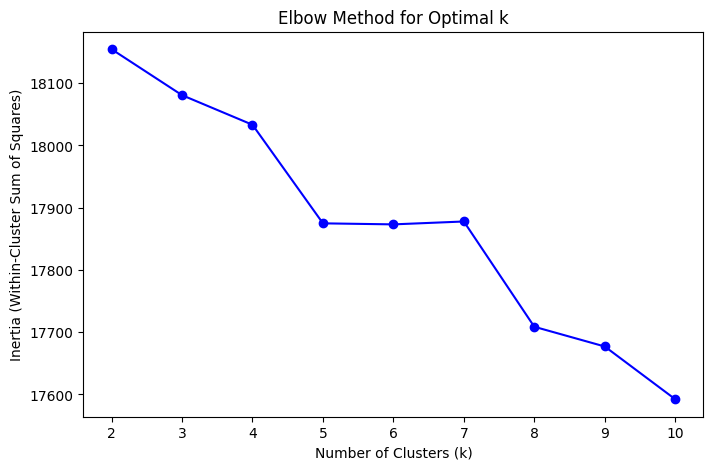

In [27]:
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [28]:
# Step 3: Choose k (say 5 types for now)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
data["video_type_cluster"] = kmeans.fit_predict(X_tfidf)

In [29]:
# Step 4: Inspect clusters
print("Sample clustered video titles:")
for cluster in range(k_optimal):
    print(f"\nCluster {cluster}:")
    print(data[data["video_type_cluster"] == cluster]["title"].head(5).tolist())

Sample clustered video titles:

Cluster 0:
['Which button would you press? #shorts', 'Девочки, скоро в роддом 😂🤰 #shorts', 'People Rejected His Kindness… Until This Smart Dog Stepped In #shorts', '老闆肩膀要加錢哦！【#小姐不熙娣】#shorts', 'Власноруч зробила деревʼяний паркан #shorts #сумщина #впо #переселенці #війна #маріуполь']

Cluster 1:
['Kontra K - Geboren Um Zu Leben feat. NESS (Official Video)', 'Rymey Gad, 9mill - 9mill (Official Music Video)', 'SSIO - Alles oder Nix (Official Video)', 'Becky G, Manuel Turizo - QUE HACES (Official Video)', 'M. P. Thompson - Slike Bleiburga (OFFICIAL LYRIC VIDEO)']

Cluster 2:
['Tạp hoá bất ngờ ổn p266(chiếc kẹo ảo thuật thật bất ngờ)#shorts', 'wow', 'ΑΛΕΞΑΝΔΡΟΣ ΤΣΟΥΒΕΛΑΣ: Στα hate comments τσακώνομαι με όλους | Unblock Podcast Ελίνα Παπίλα', 'Lo mejor y lo peor de 2024 #7', 'DORAYAKI (Videoclip Oficial) - Karina, Hugo23, Osquitar - Con Letra']

Cluster 3:
['Probando Menus Secretos en Lugares de Comida Rapida.', 'Solo si tienen Rasgos en Común en FUT DRAFT', '

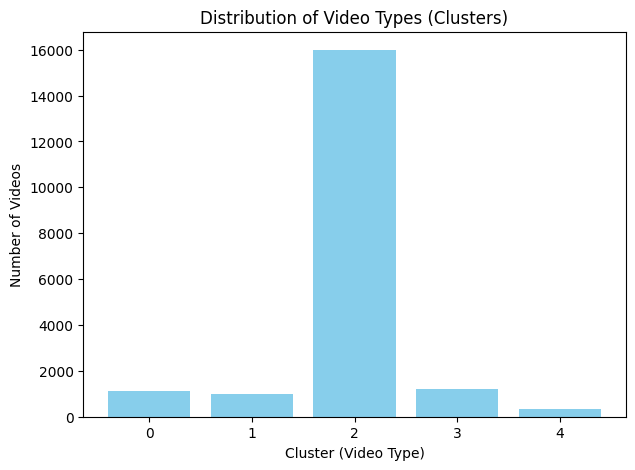

In [30]:
# Step 5: Visualize cluster distribution
cluster_counts = data["video_type_cluster"].value_counts().sort_index()
plt.figure(figsize=(7, 5))
plt.bar(cluster_counts.index, cluster_counts.values, color="skyblue")
plt.xlabel("Cluster (Video Type)")
plt.ylabel("Number of Videos")
plt.title("Distribution of Video Types (Clusters)")
plt.show()

In [37]:
import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Fix randomness in langdetect
DetectorFactory.seed = 0

# Load dataset
data = pd.read_csv("train.csv")

def detect_language(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return "unknown"

# Apply language detection on 'title'
data["lang"] = data["title"].apply(detect_language)

# Filter only English titles
data_en = data[data["lang"] == "en"]

print("Original dataset size:", data.shape[0])
print("English-only dataset size:", data_en.shape[0])

# Save filtered dataset if needed
data_en.to_csv("train_english.csv", index=False)


Original dataset size: 19600
English-only dataset size: 7606
